In [1]:
import pandas as pd

df = pd.read_csv('../data/processed/Meteorite_Landings_addedcountries.csv')

df.head()

,name,id,nametype,class,mass (g),fall,year,latitude,longitude,category,country,city
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,Chondrite,Germany,Aachen
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,Chondrite,Denmark,Århus
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,Chondrite,Canada,Lamont
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,Achondrite,Mexico,Acapulco de Juárez
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,Chondrite,Argentina,Achiras


              name            id nametype  class      mass (g)   fall  \
count        38114  38114.000000    38114  38114  3.811400e+04  38114   
unique       38114           NaN        2    422           NaN      2   
top     Zulu Queen           NaN    Valid     L6           NaN  Found   
freq             1           NaN    38093   7519           NaN  37049   
mean           NaN  25342.304481      NaN    NaN  1.560111e+04    NaN   
std            NaN  17394.825419      NaN    NaN  6.286900e+05    NaN   
min            NaN      1.000000      NaN    NaN  0.000000e+00    NaN   
25%            NaN  10831.250000      NaN    NaN  6.630000e+00    NaN   
50%            NaN  21731.500000      NaN    NaN  2.908500e+01    NaN   
75%            NaN  39886.500000      NaN    NaN  1.873350e+02    NaN   
max            NaN  57458.000000      NaN    NaN  6.000000e+07    NaN   

                year      latitude     longitude   category     country  \
count   38114.000000  38114.000000  38114.000000

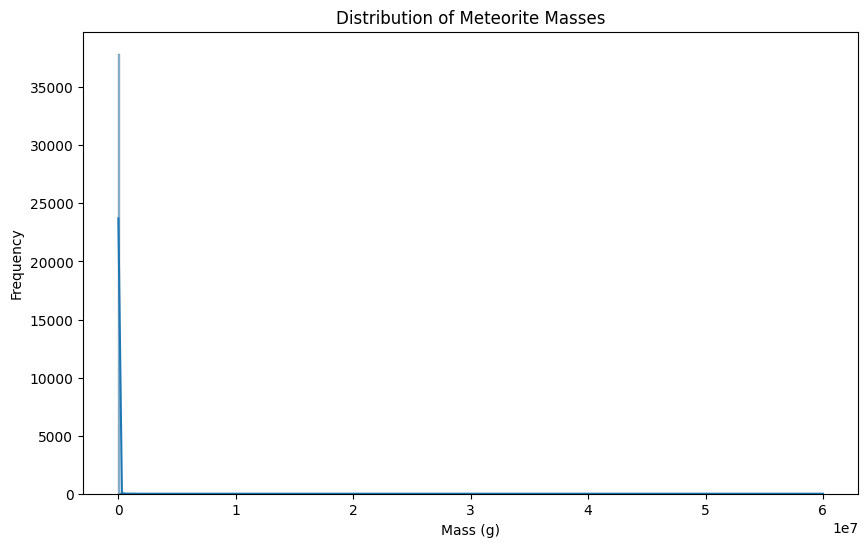

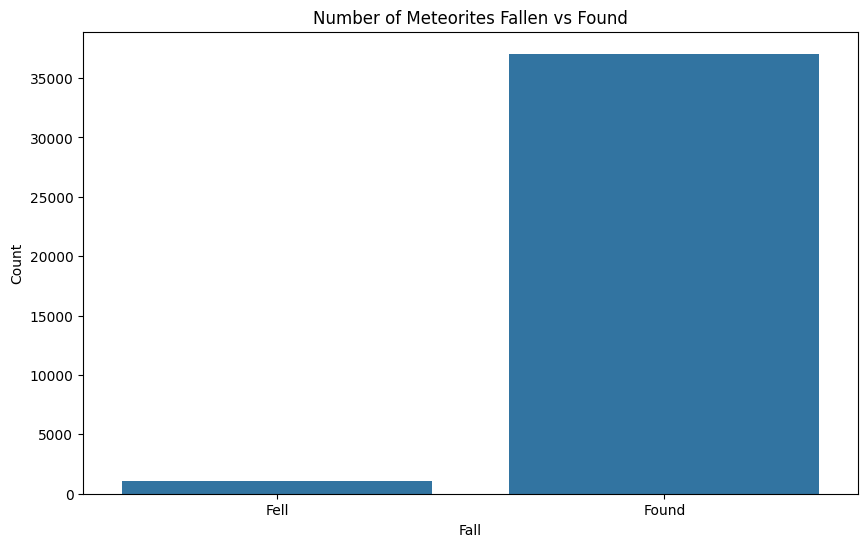

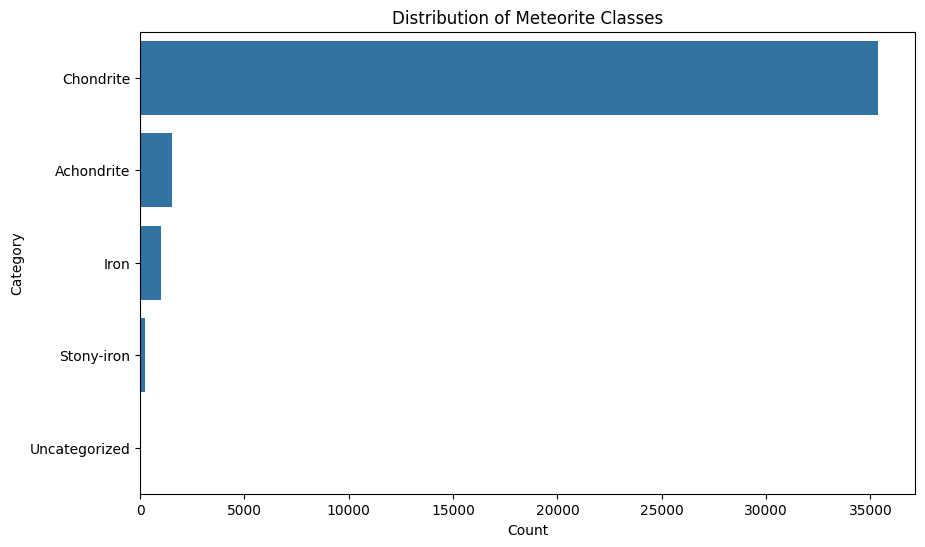

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

# Display basic statistics
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

# Plot the distribution of meteorite masses
plt.figure(figsize=(10, 6))
sns.histplot(df['mass (g)'], bins=500, kde=True)
plt.title('Distribution of Meteorite Masses')
plt.xlabel('Mass (g)')
plt.ylabel('Frequency')
plt.show()

# Plot the number of meteorites fallen vs found
plt.figure(figsize=(10, 6))
sns.countplot(x='fall', data=df)
plt.title('Number of Meteorites Fallen vs Found')
plt.xlabel('Fall')
plt.ylabel('Count')
plt.show()

# Plot the distribution of meteorite classes
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribution of Meteorite Classes')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

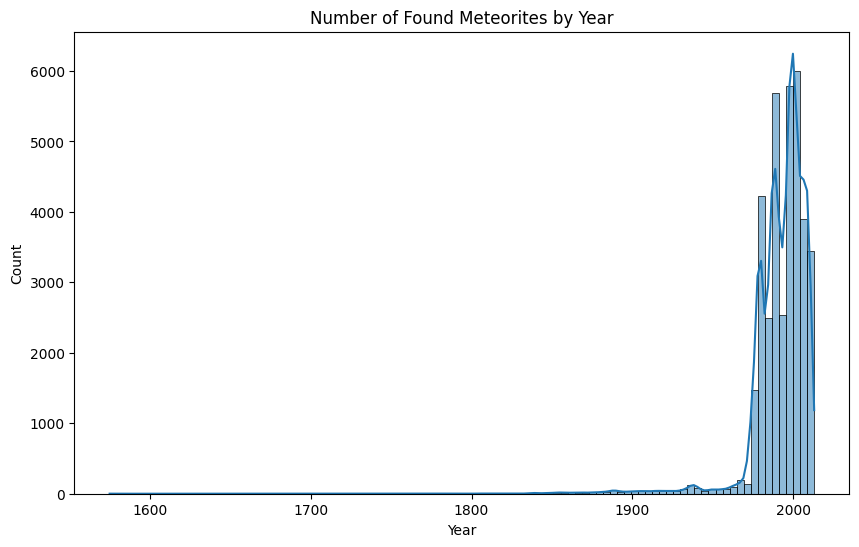

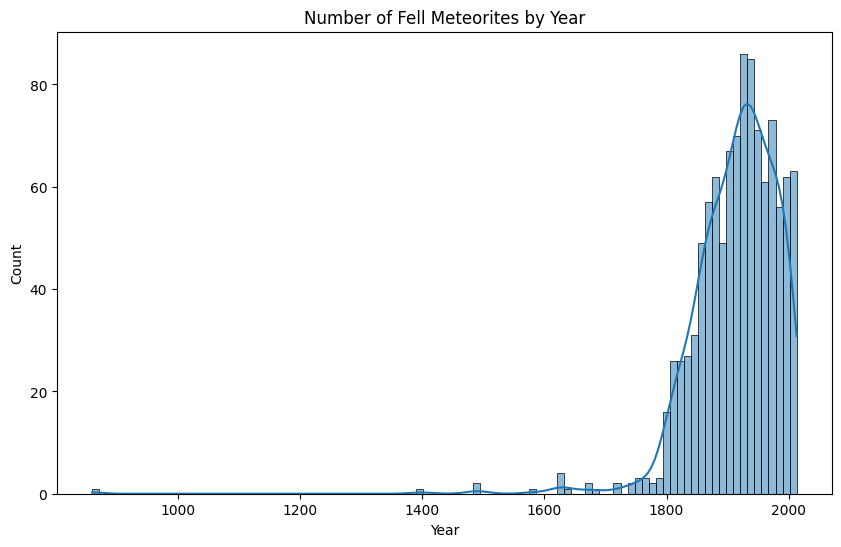

In [3]:
# Plot the number of found meteorites by year
plt.figure(figsize=(10, 6))
sns.histplot(df[df['fall'] == 'Found']['year'], bins=100, kde=True)
plt.title('Number of Found Meteorites by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Plot the number of fell meteorites by year
plt.figure(figsize=(10, 6))
sns.histplot(df[df['fall'] == 'Fell']['year'], bins=100, kde=True)
plt.title('Number of Fell Meteorites by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

[Text(0, 0, '22097'),
 Text(0, 0, '6186'),
 Text(0, 0, '2979'),
 Text(0, 0, '1648'),
 Text(0, 0, '1487'),
 Text(0, 0, '634'),
 Text(0, 0, '586'),
 Text(0, 0, '405'),
 Text(0, 0, '228'),
 Text(0, 0, '207')]

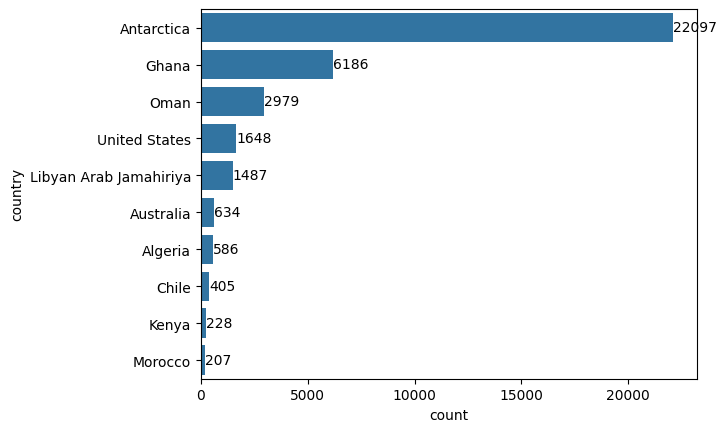

In [4]:
topcountries=df.groupby('country')['country'].value_counts().sort_values(ascending=False).head(10)
countries = sns.barplot(topcountries,orient='h')
countries.bar_label(countries.containers[0], fontsize=10)

<Axes: xlabel='count', ylabel='class'>

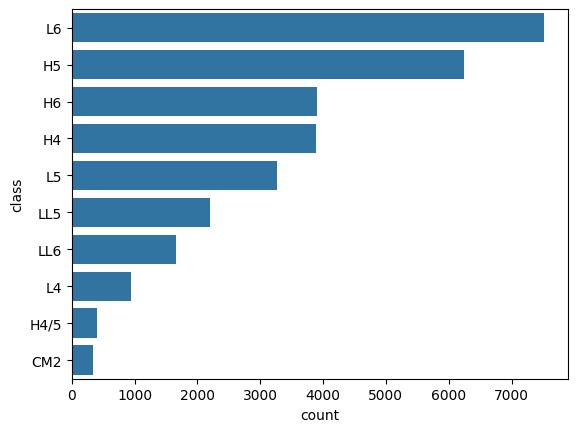

In [5]:
top10common = df.groupby('class')['class'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(top10common,orient='h')


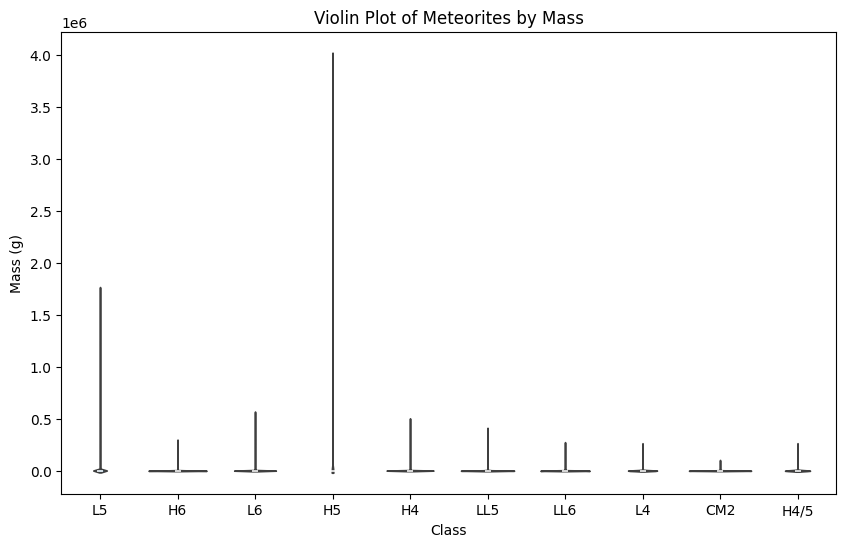

In [12]:
# Filter the dataframe for the top most common class of meteorites
top_class = top10common.index[0:]
top_classes_df = df[df['class'].isin(top_class)]

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='mass (g)', data=top_classes_df)
plt.title(f'Violin Plot of Meteorites by Mass')
plt.xlabel('Class')
plt.ylabel('Mass (g)')
plt.show()